In [2]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
import copy
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm
from scipy import integrate

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: /global/u1/x/xiaobo23/tensor_networks/SF


In [4]:
goldenRatio = (5**.5 - 1) / 2.

In [5]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [6]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):
    tmp_file = h5py.File(file_name, "r")
    if label not in tmp_file.keys():
        print("Error: key doesn't exist!")
    else:
        tmp_Sz = np.array(tmp_file[label]).transpose()
    # print(tmp_Sz.shape)
    return tmp_Sz

In [7]:
# def fitting(input_x, input_y, input_degree:int):
#     degree = input_degree
#     coeffs = np.polyfit(input_x, input_y, degree)
#     poly = np.poly1d(coeffs)

#     return poly

#### Analyze the ground-state of the t-K model with three-spin interactions

In [8]:
Lx = 50
Ly = 2
N  = Lx * Ly - 2

In [9]:
Jp = np.round(np.arange(0, 0.32, 0.01), decimals = 3)
Jp

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31])

In [10]:
files = []
for value in np.round(Jp, decimals=2):
    if (value * 100) % 10 == 0:
        filename = "ladder/delta0.04/N50_t100/data/heisenberg_J20.35_delta0.04_Jp{:.1f}.h5".format(value)
    else:
        filename = "ladder/delta0.04/N50_t100/data/heisenberg_J20.35_delta0.04_Jp{:.2f}.h5".format(value)
    files.append(filename)
# files

In [11]:
labels = []
for idx, tmp in enumerate(Jp):
    tmp_string = r"$J = {:.2f}$".format(tmp)
    labels.append(tmp_string)
# labels

In [12]:
color = obtain_colors(35, cm.coolwarm)

In [13]:
E0 = []
for idx, file in enumerate(files):
    E0.append(data_extrapolation(file, "energy"))
E0 = np.array(E0) / N
E0

array([-0.39616782, -0.3961755 , -0.39619857, -0.39623711, -0.39629118,
       -0.39636087, -0.39644628, -0.39654751, -0.39666469, -0.39679794,
       -0.39694742, -0.3971133 , -0.39729577, -0.39749503, -0.39771133,
       -0.39794494, -0.39819615, -0.3984653 , -0.39875278, -0.39905903,
       -0.39938455, -0.39972993, -0.40009583, -0.40048306, -0.40089257,
       -0.40132551, -0.40178329, -0.40226772, -0.40278116, -0.40332678,
       -0.40390912, -0.40453485])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


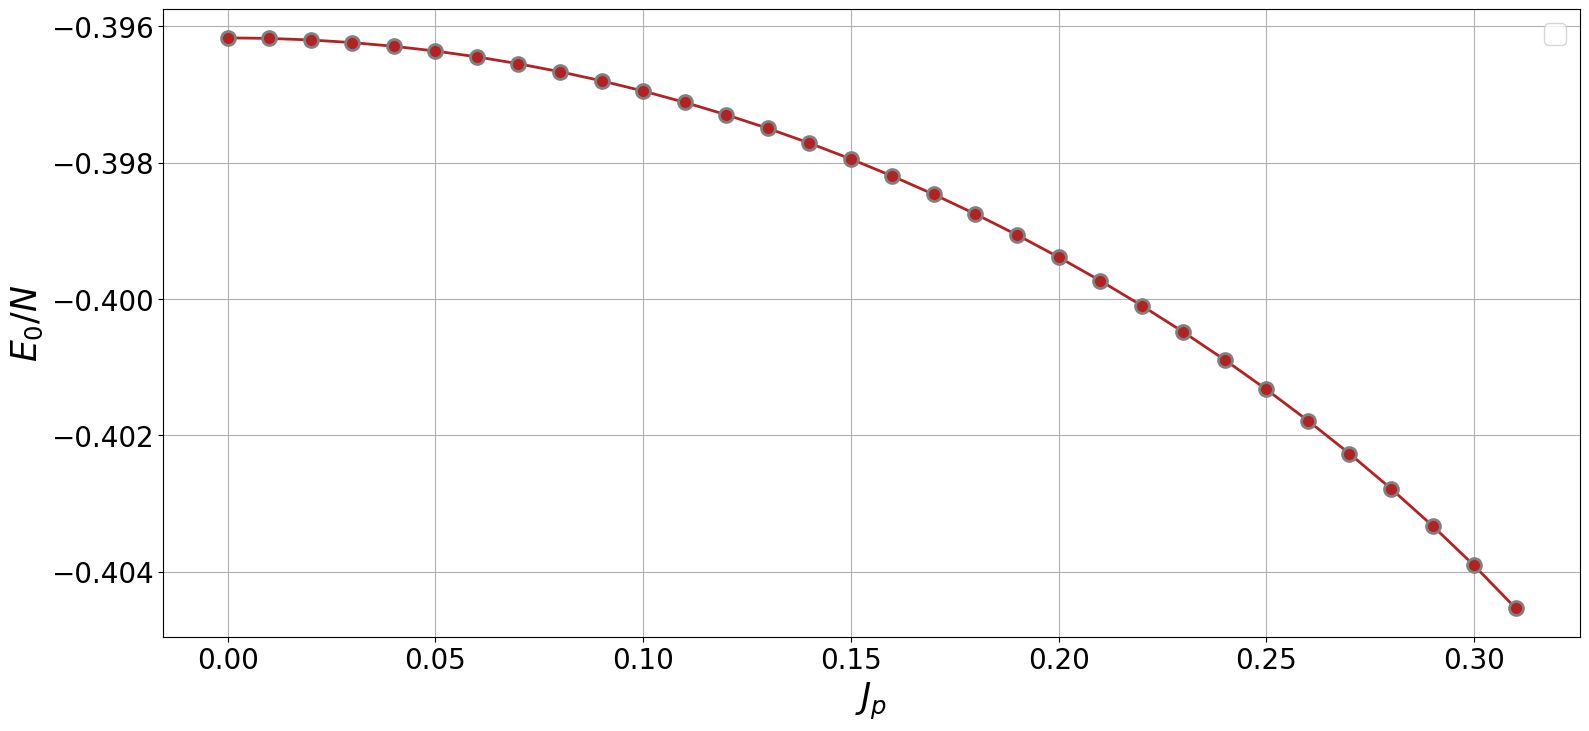

In [14]:
'''
    Plot energy per site for the doped FM t-Kitaev model with edge potential
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
ax.plot(Jp, E0, color = "firebrick", linestyle = "-", linewidth = 2, \
        marker = "o", markersize = 10, markeredgecolor = "gray", markeredgewidth = 2)
# ax.plot(Jp, E1, color = "royalblue", linestyle = "-", linewidth = 2, \
#         marker = "o", markersize = 10, markeredgecolor = "gray", markeredgewidth = 2)

ax.set_xlabel(r"$J_{p}$", fontsize = 25)
ax.set_ylabel(r"$E_{0}/N$", fontsize = 25)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("Figures/tK_AFM_Lx12_pinning_E0_t0.01.pdf")

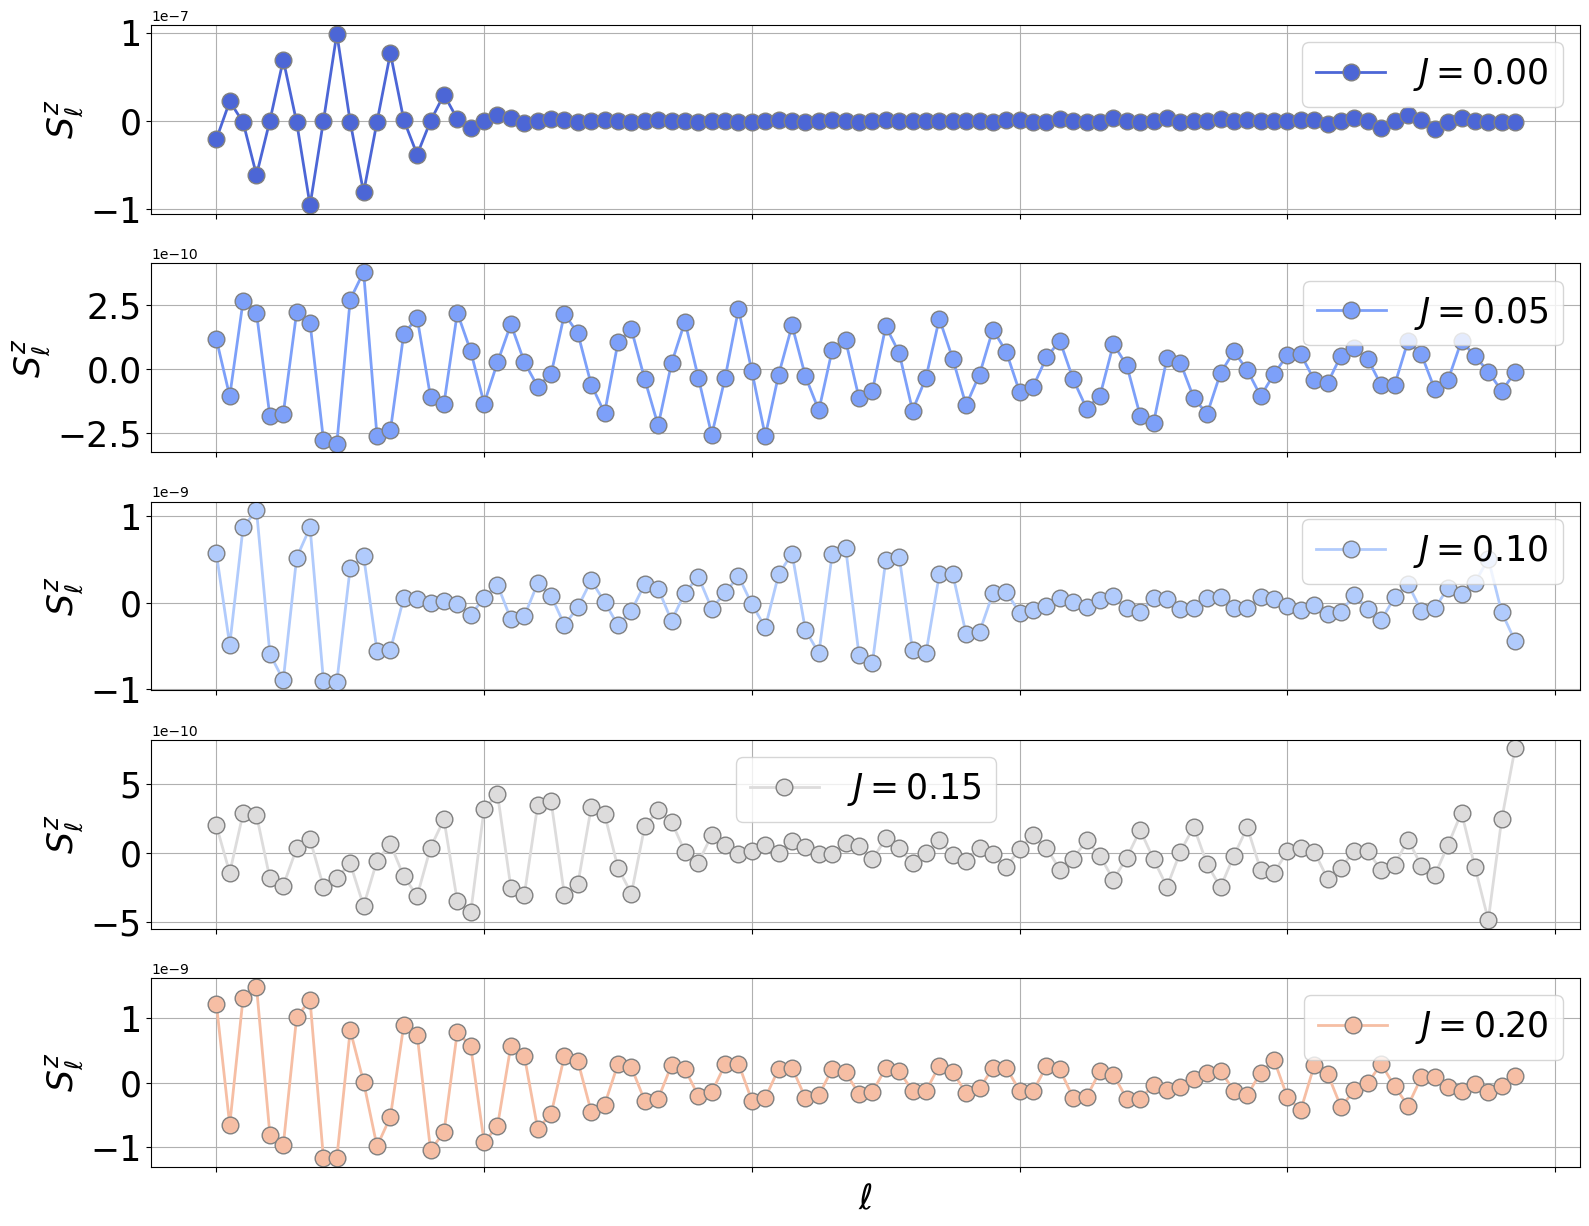

In [15]:
'''
    Plot the expectation values of the order parameters
'''

fig = plt.figure(figsize = (16, 20 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 5, ncols = 1, figure = fig)


for idx, file in enumerate(files):
    obs = data_extrapolation(file, "Sz")
    if idx % 5 == 0 and idx <= 20:
        ax = fig.add_subplot(spec[idx//5, 0])
        ax.plot(np.arange(0, N), obs, color = color[idx + 2], \
            marker = "o", markersize = 12, markeredgewidth = 1, markeredgecolor = "grey", \
            linestyle = "-", linewidth = 2, label = labels[idx])       

    if idx == 20:
        ax.set_xlabel(r"$\ell$", fontsize = 25)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel(r"$S^{z}_{\ell}$", fontsize = 25)
    ax.tick_params(axis = "both", which = "major", labelsize = 25) 	
    ax.legend(frameon = True, fontsize = 25, ncol = 1)
    ax.grid(True)   

# plt.savefig("Figures/tK_AFM_Lx12_tscan_order_parameter.pdf")

In [16]:
# '''
#     Plot the expectation values of the order parameters
# '''

# fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)


# ax = fig.add_subplot(spec[0, 0])
# for idx, file in enumerate(files):
#     obs = data_extrapolation(file, "Czz")
#     ax.plot(np.arange(40, 60), obs[49, 40 : 60], color = color[idx], \
#             marker = "o", markersize = 12, markeredgewidth = 1, markeredgecolor = "grey", \
#             linestyle = "-", linewidth = 2, label = labels[idx])        

# ax.set_xlabel(r"$\ell$", fontsize = 25)
# ax.set_ylabel(r"$C^{zz}(\ell, \ell')$", fontsize = 25)
# ax.tick_params(axis = "both", which = "major", labelsize = 25) 	
# # ax.legend(frameon = True, fontsize = 25, ncol = 1)
# ax.grid()

# # plt.savefig("Figures/tK_AFM_Lx12_tscan_order_parameter.pdf")

#### Analyze time-dependent spin-spin correlation functions & obtain the spectral function

In [46]:
# Define the path to the target file
file = files[15]
file

'ladder/delta0.04/N50_t100/data/heisenberg_J20.35_delta0.04_Jp0.15.h5'

In [47]:
Czz1 = data_extrapolation(file, "Czz1")
Czz2 = data_extrapolation(file, "Czz2")
Czz3 = data_extrapolation(file, "Czz3")
Czz4 = data_extrapolation(file, "Czz4")

In [48]:
Czz1.shape

(1000, 98)

In [49]:
def visualize_time_dependent_correlation(Czz):
    """
    Plot spin correlation function as a heatmap.
    
    Parameters
    ----------
    Czz1 : numpy.ndarray
        2D array containing spin correlation data
    """
    # Create elegant heatmap with improved styling
    fig = plt.figure(figsize=(16, 12 * goldenRatio), constrained_layout=True)
    spec = gridspec.GridSpec(nrows=1, ncols=1, figure=fig)
    
    ax = fig.add_subplot(spec[0, 0])
    
    # Plot with improved colormap and interpolation
    im1 = ax.imshow(Czz[0 : 100, :].real, cmap='coolwarm', aspect='auto', origin='lower', 
                    interpolation='bilinear')
    
    # Elegant colorbar
    cbar = fig.colorbar(im1, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label(r'$C^{zz}(t, \ell)$', fontsize=20, rotation=270, labelpad=25)
    
    # Clean tick styling
    ax.set_xticks(np.arange(0, 101, 20))
    ax.set_xticklabels([r'$0$', r'$20$', r'$40$', r'$60$', r'$80$', r'$100$'], fontsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    # Clear axis labels
    ax.set_xlabel(r'Site $\ell$', fontsize=20, labelpad=10)
    ax.set_ylabel(r'Time $t$', fontsize=20, labelpad=10)
    # ax.set_title('Spin Correlation Function', fontsize=22, pad=15)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.show()
    # plt.savefig('Figures/spin_correlation_heatmap.pdf', dpi=300, bbox_inches='tight')
    
    # return fig, ax

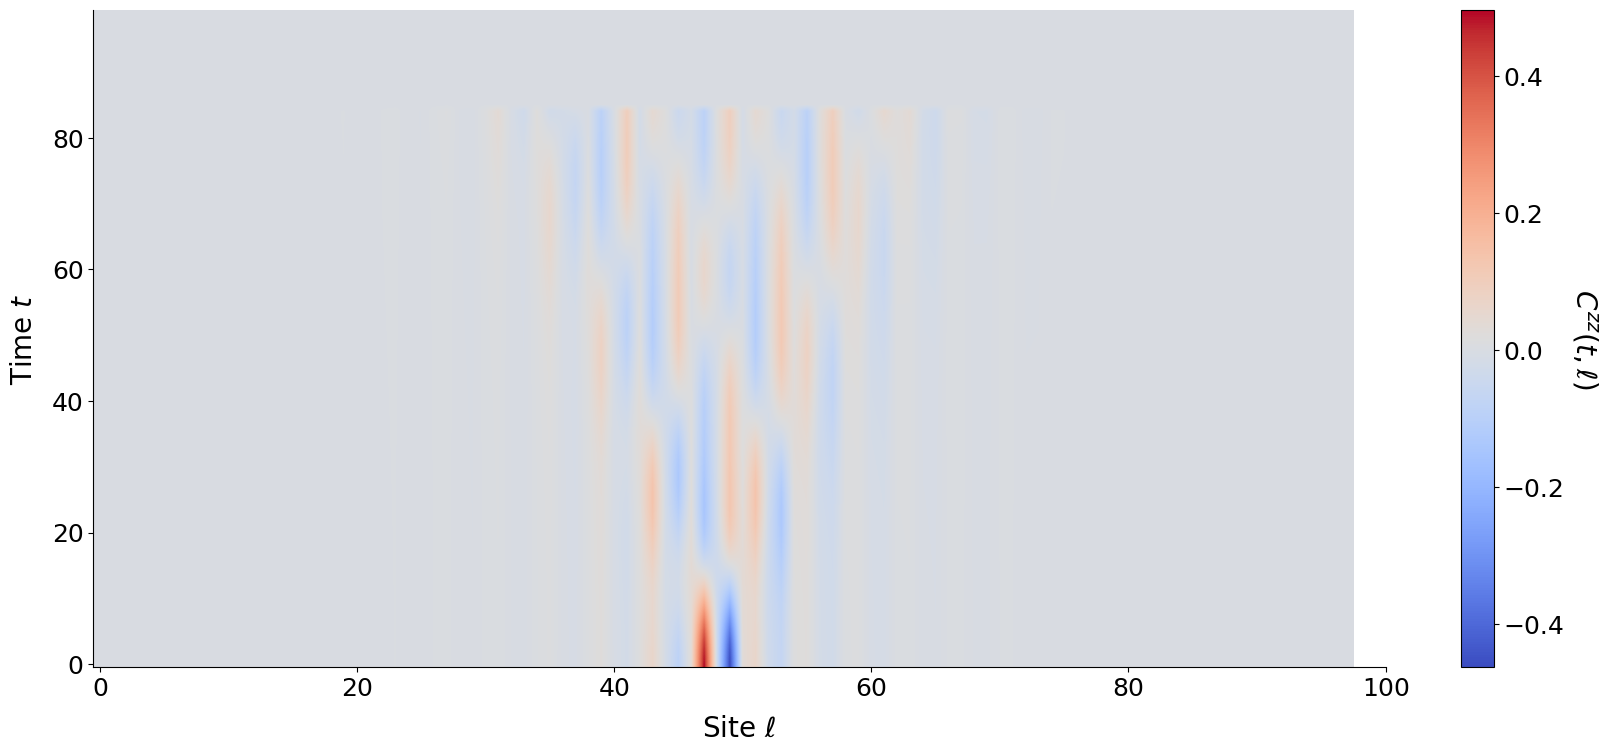

In [50]:
visualize_time_dependent_correlation(Czz1)

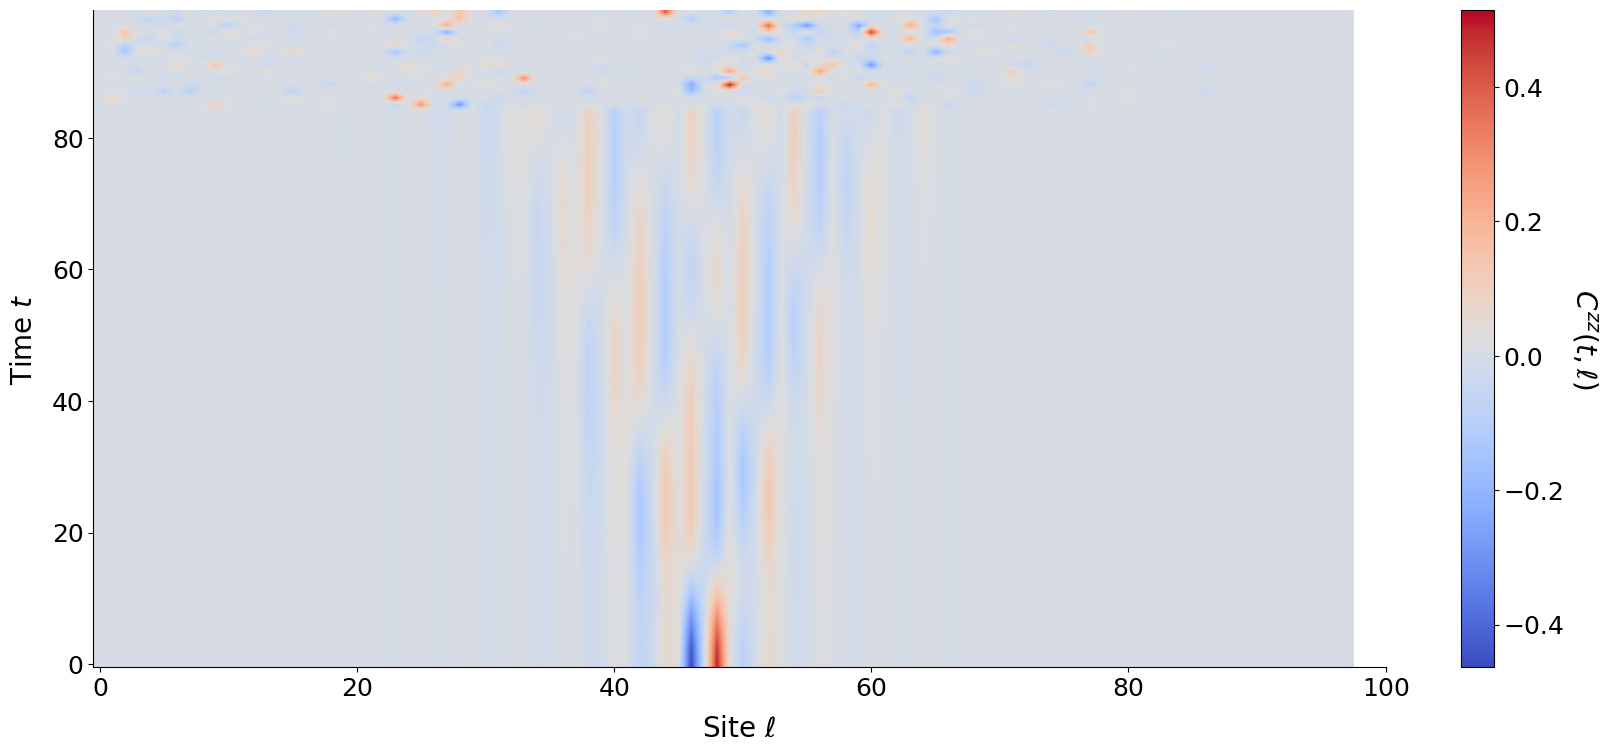

In [51]:
visualize_time_dependent_correlation(Czz2)

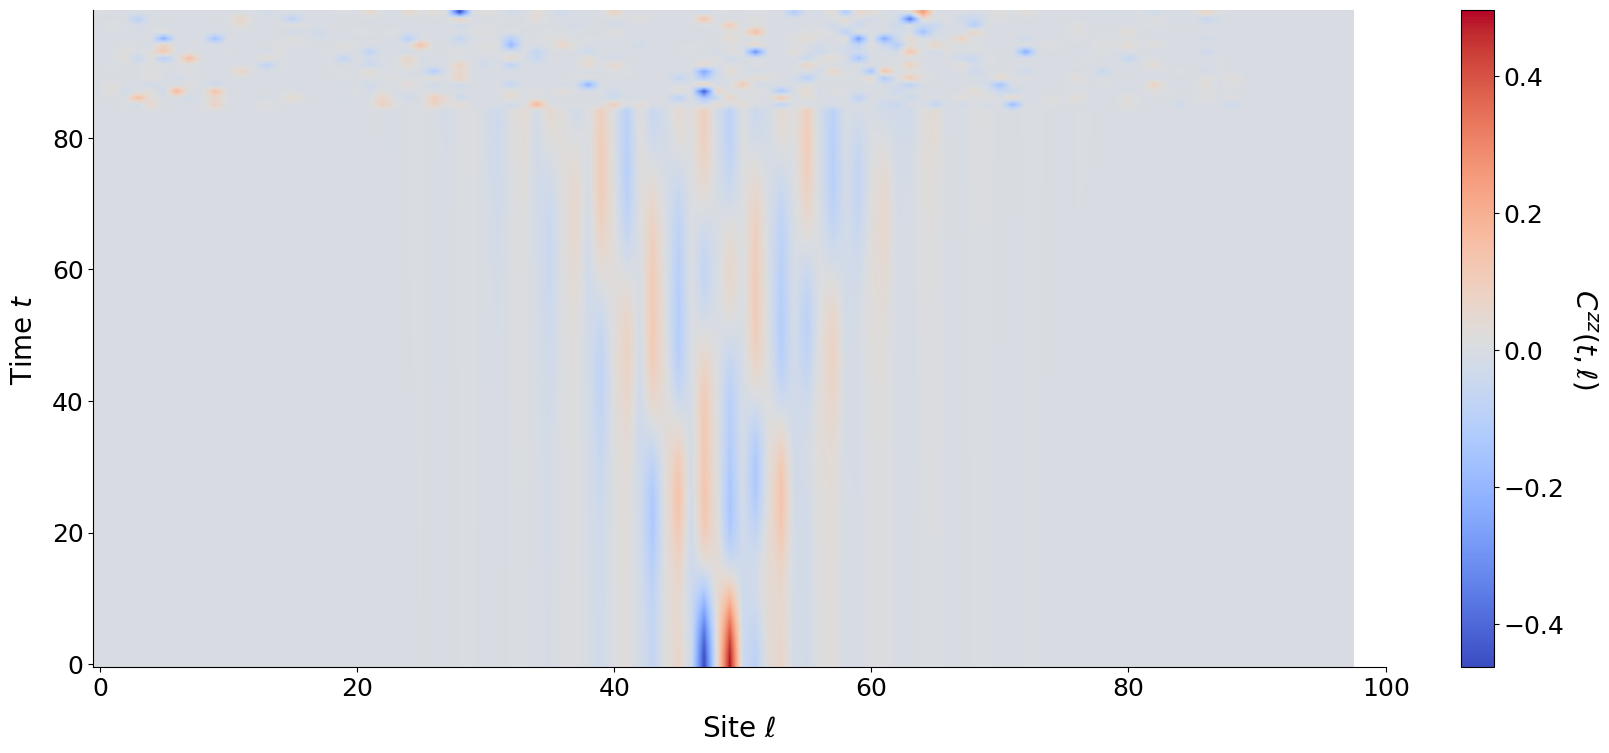

In [52]:
visualize_time_dependent_correlation(Czz3)

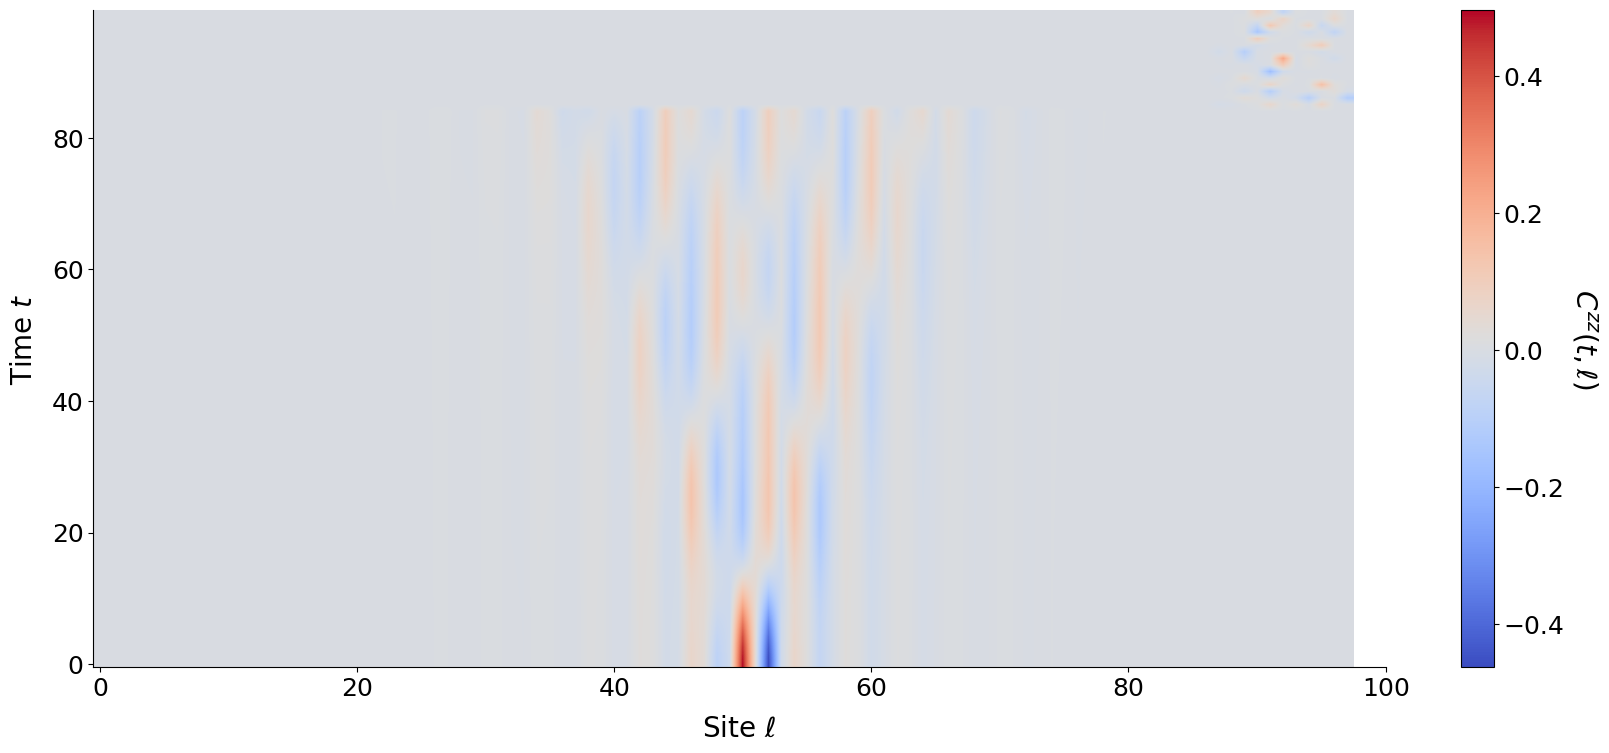

In [53]:
visualize_time_dependent_correlation(Czz4)

In [54]:
def fourier(tList_, gt_, wList_, eta):
    Aw = np.zeros([2, len(wList_)], dtype=complex)
    
    #print("simps Lorientz broadening.....")
    for iw, w in enumerate(wList_):
        y_ = np.exp(1j * w * tList_ - eta * abs(tList_)**2) * gt_
        Aw[1, iw] = integrate.simpson(y_, x=tList_)

    Aw[0, :] = wList_
    # weight = np.sum(-1 * gw[1, :].imag / np.pi) * dw
    # print("summed weight is ", weight)

    
    return Aw

In [55]:
time_limit = 1000 
for index in range(Czz1.shape[0]):
    if math.sqrt(pow(Czz1[index, N//2 - 2].real, 2) + pow(Czz1[index, N//2 - 2].imag, 2)) < 1e-8:
        time_limit = index
        break
print(time_limit)

85


In [56]:
# Remove certain sites on the left and right to avoid egde effects
starting_point = 9
ending_point = 89

In [57]:
# Only use the non-zero part of the time-dependent correlation function to do double Fourier transform to obtain the spectral function
# To analyze the data on the lfy
input1 = Czz1[0 : time_limit, starting_point : ending_point].transpose()
input2 = Czz2[0 : time_limit, starting_point : ending_point].transpose()
input3 = Czz3[0 : time_limit, starting_point : ending_point].transpose()
input4 = Czz4[0 : time_limit, starting_point : ending_point].transpose()

input1.shape

(80, 85)

In [58]:
Czz1_tensor = np.zeros((40, 2, time_limit), dtype=complex)
Czz1_tensor[:, 0, :] = input1[0::2, :]   
Czz1_tensor[:, 1, :] = input1[1::2, :]
Czz1_tensor.shape

(40, 2, 85)

In [59]:
Czz2_tensor = np.zeros((40, 2, time_limit), dtype=complex)
Czz2_tensor[:, 0, :] = input2[0::2, :]   
Czz2_tensor[:, 1, :] = input2[1::2, :]
Czz2_tensor.shape

(40, 2, 85)

In [60]:
Czz3_tensor = np.zeros((40, 2, time_limit), dtype=complex)
Czz3_tensor[:, 0, :] = input3[0::2, :]   
Czz3_tensor[:, 1, :] = input3[1::2, :]
Czz3_tensor.shape

(40, 2, 85)

In [61]:
Czz4_tensor = np.zeros((40, 2, time_limit), dtype=complex)
Czz4_tensor[:, 0, :] = input4[0::2, :]   
Czz4_tensor[:, 1, :] = input4[1::2, :]
Czz4_tensor.shape

(40, 2, 85)

In [62]:
# Define parameters that are used in the double Fouriter transform
delta_tau = 0.1     # Trotter step size
eta = 0.05          # Damping factor to avoid spectral weight leakage
wList = np.arange(-5, 5, 0.01)

In [63]:
def fourier(tList_, gt_, wList_, eta):
    Aw = np.zeros([2, len(wList_)], dtype=complex)
    
    #print("simps Lorientz broadening.....")
    for iw, w in enumerate(wList_):
        y_ = np.exp(1j * w * tList_ - eta * abs(tList_)**2) * gt_
        Aw[1, iw] = integrate.simpson(y_, x=tList_)

    Aw[0, :] = wList_
    # weight = np.sum(-1 * gw[1, :].imag / np.pi) * dw
    # print("summed weight is ", weight)
    return Aw

In [64]:
def obtain_spectral(g_r_t_, wList_, eta_, dt_, reference, lower_bound, upper_bound):
    Nsite_x = g_r_t_.shape[0]
    Nsite_y = g_r_t_.shape[1]
    Nt = g_r_t_.shape[2]
    
    kList_x = np.arange(-np.pi, np.pi, 2.0 * np.pi / float(Nsite_x))
    kList_y = np.arange(-np.pi, np.pi, 2.0 * np.pi / float(Nsite_y))
    tList = np.asarray([i*dt_ for i in range(Nt)])

    
    tmp_ref = reference - lower_bound + 1
    ref_x = (tmp_ref - 1) // 2 + 1
    ref_y = (tmp_ref - 1) % 2 + 1


    g_k_t_ = np.zeros_like(g_r_t_, dtype=complex)
    for idx2, ky in enumerate(kList_y):
        for idx1, kx in enumerate(kList_x):
            for site in range(lower_bound, upper_bound):
                tmp = site - lower_bound + 1
                site_x = (tmp - 1) // 2 + 1
                site_y = (tmp - 1) % 2 + 1
                g_k_t_[idx1, idx2, :] += np.exp(-1j * kx * (site_x - ref_x) + 1j * ky * (site_y - ref_y)) * g_r_t_[site_x - 1, site_y - 1, :]
    
        
    g_k_w_ = np.zeros([len(kList_x), len(kList_y), len(wList_)], dtype=complex)
    for idx1, kx in enumerate(kList_x):
        for idx2, ky in enumerate(kList_y):
            g_k_w_[idx1, idx2, :] = fourier(tList, g_k_t_[idx1, idx2, :], wList_, eta_)[1,:]
    
    return g_k_w_

In [65]:
# Perform Fourtier transform of time-dependent correlation function based on reference site 1
spectral1 = obtain_spectral(Czz1_tensor, wList, eta, delta_tau, N//2 - 2, starting_point, ending_point)

In [66]:
# Perform Fourier transform of time-dependent correlation function based on reference site 2
spectral2 = obtain_spectral(Czz2_tensor, wList, eta, delta_tau, N//2 - 1, starting_point, ending_point)

In [67]:
# Perform Fourier transform of time-dependent correlation function based on reference site 3
spectral3 = obtain_spectral(Czz3_tensor, wList, eta, delta_tau, N//2, starting_point, ending_point)

In [68]:
# Perform Fourier transform of time-dependent correlation function based on reference site 4
spectral4 = obtain_spectral(Czz4_tensor, wList, eta, delta_tau, N//2 + 1, starting_point, ending_point)

In [69]:
spectral = spectral1 + spectral2 + spectral3 + spectral4

/tmp/ipykernel_423074/2603630918.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$2\pi$"], fontsize = 20)
/tmp/ipykernel_423074/2603630918.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$2\pi$"], fontsize = 20)


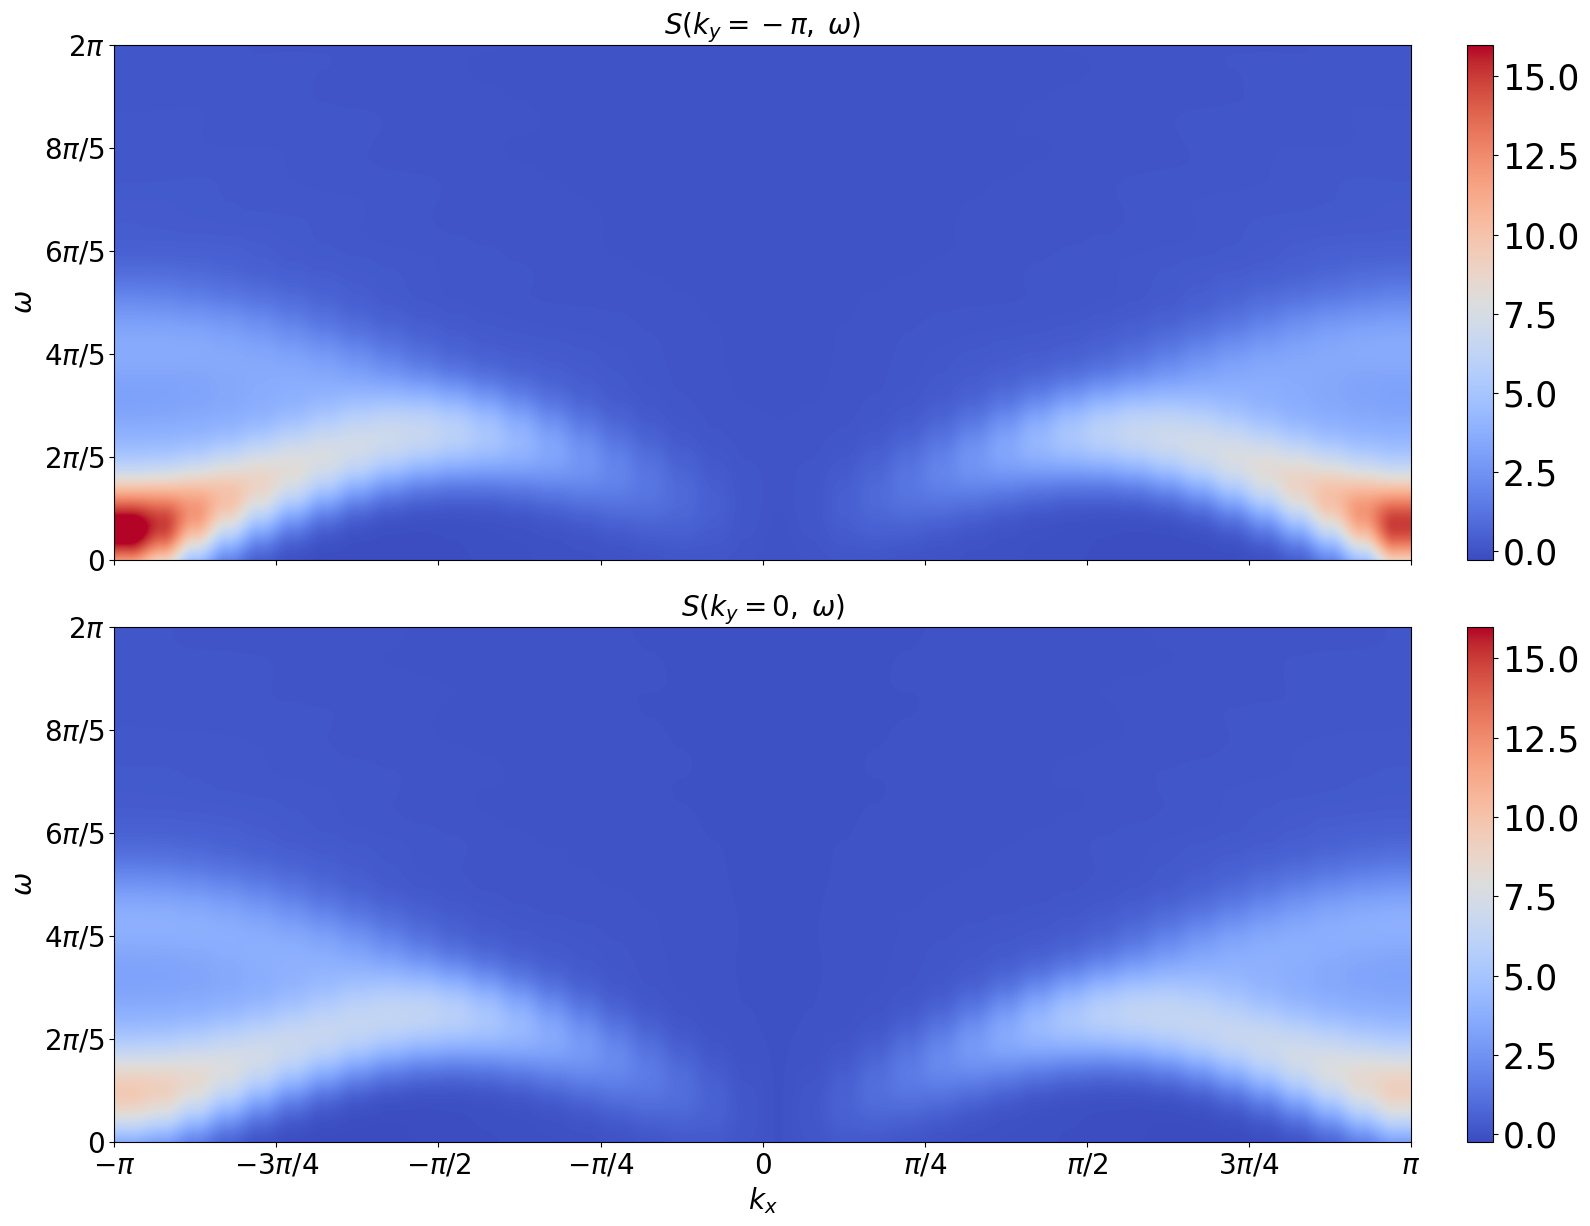

In [73]:
# Plot the spectral function
fig = plt.figure(figsize=(16, 20 * goldenRatio), tight_layout=True)
spec = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)


# Plot the spectral function at ky = 0
ax = fig.add_subplot(spec[0, 0])
spectral_to_plot = spectral[:, 0, :]
im = ax.imshow(
    spectral_to_plot.real.T, 
    cmap="coolwarm", 
    vmax=16, 
    aspect="auto", 
    origin="lower",
    extent=[0, spectral_to_plot.shape[0]-1, 0, spectral_to_plot.shape[1]-1]
)
cbar = fig.colorbar(im, fraction=0.035, pad=0.04)
cbar.ax.tick_params(labelsize=25)


ax.set_ylabel(r"$\omega$", fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Set custom tick labels
ax.set_xticks(np.linspace(0, spectral_to_plot.shape[0]-1, 9))
ax.set_xticklabels([], fontsize = 20)
ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$2\pi$"], fontsize = 20)
ax.set_ylim(500, 1000)
ax.set_title(r"$S(k_{y}=-\pi, \; \omega)$", fontsize=20)



# Plot the spectral function at ky = pi
ax = fig.add_subplot(spec[1, 0])
spectral_to_plot = spectral[:, 1, :]
im = ax.imshow(
    spectral_to_plot.real.T, 
    cmap="coolwarm", 
    vmax=16, 
    aspect="auto", 
    origin="lower",
    extent=[0, spectral_to_plot.shape[0]-1, 0, spectral_to_plot.shape[1]-1]
)
cbar = fig.colorbar(im, fraction=0.035, pad=0.04)
cbar.ax.tick_params(labelsize=25)

ax.set_xlabel(r"$k_{x}$", fontsize=20)
ax.set_ylabel(r"$\omega$", fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Set custom tick labels
ax.set_xticks(np.linspace(0, spectral_to_plot.shape[0]-1, 9))
ax.set_xticklabels([r"$-\pi$", r"$-3\pi/4$", r"$-\pi/2$", r"$-\pi/4$", r"$0$", 
                    r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"], fontsize = 20)
ax.set_yticklabels([r"$0$", r"$2\pi/5$", r"$4\pi/5$", r"$6\pi/5$", r"$8\pi/5$", r"$2\pi$"], fontsize = 20)
ax.set_ylim(500, 1000)
ax.set_title(r"$S(k_{y}=0, \; \omega)$", fontsize=20)


plt.savefig("figures/J1_J2_dimerized_Heisenberg_spectral_function_Jp0.15.pdf")